In [1]:
import rebound 

import sympy as sp
from matplotlib import pyplot as plt
from matplotlib import pyplot

import numpy as np

from sympy import init_printing
init_printing()

%matplotlib inline
from sympy import *

import math

In [2]:
# plot style and colour
plt.style.use('seaborn')
plt.rcParams['axes.facecolor']='whitesmoke'

# plot border
plt.rcParams["axes.edgecolor"] = '0'
plt.rcParams["axes.linewidth"]  = 0.7

# Predicting an Astrometric signal

## Variables set 

In [3]:
timescale = 4.2

planet_inc = 2
m_planet = 0.0143188

m_star  = 1                                                # M_sun
z_star  = 50*206265                                        # AU
v_star  = 4.74*(50*0.001)*(50)* (1/1.496e+8) * (3.154e+7)  # AU/year
vz_star = 0.1*v_star                                       # AU/year

## Simulations

In [4]:
sim_wp = rebound.Simulation()                                                               # create a simulation named sim_wp 

sim_wp.units=["msun","AU","year"]                                                           # setting units of sim_wpm

sim_wp.add(m=1)                                                                             # add the Sun as the central object 

sim_wp.add(m=3.0027e-6, a=1, e=0)                                                           # add Earth in a 1 AU circular orbit 

sim_wp.add(x = 1.031e7, vy=v_star, m = m_star, z = z_star, vz=vz_star)                      # add a star 50 pc away with calculated velocity and set parameters

sim_wp.add(m = m_planet, a = 0.6, e = 0.2, primary = sim_wp.particles[2], inc=planet_inc)  # add planet from figure 3.1 caption and have it orbit the star 

In [5]:
com_particle = sim_wp.calculate_com(first=2,last=4)

In [6]:
sim = rebound.Simulation()                          # create a simulation named sim 

sim.units=["msun","AU","year"]                      # setting units of sim 

sim.add(m=1)                                        # add the Sun as the central object 

sim.add(m=3.0027e-6, a=1, e=0)                      # add Earth in a 1 AU circular orbit 

sim.add(com_particle)                               # add a particle equivaent to the star-planet barycentre

## Arrays to hold data 

In [7]:
m = 200
times = np.linspace(0,timescale,num=m)

In [8]:
# positions of sun, earth, star and planet
pos_sun   , pos_sun_wp    = np.zeros((m,3)) , np.zeros((m,3))
pos_earth , pos_earth_wp  = np.zeros((m,3)) , np.zeros((m,3))
pos_star  , pos_star_wp   = np.zeros((m,3)) , np.zeros((m,3))
pos_planet_wp             = np.zeros((m,3))

# center of mass 
sun_earth_com , sun_earth_com_wp = np.zeros((m,3)) , np.zeros((m,3))
all_com       , all_com_wp       = np.zeros((m,3)) , np.zeros((m,3))

# r_star - r_earth vector
r_SE, r_SE_wp  = np.zeros((m,3)), np.zeros((m,3))

# length of r_star - r_earth vector in x-y plane
r_SE_xy, r_SE_xy_wp = np.zeros((m,1)), np.zeros((m,1))

# right ascension and declination
alpha , alpha_wp  = np.empty((m,1)) , np.empty((m,1))
delta , delta_wp  = np.empty((m,1)) , np.empty((m,1))

r_COM_xy = np.zeros((m,1))
alpha_COM = np.empty((m,1))
delta_COM = np.empty((m,1))

## Filling arrays with data using a for loop

In [9]:
for i,t in enumerate(times):
    sim.integrate(t)
    sim_wp.integrate(t)
    
    # positions of sun, earth and star
    pos_sun[i]   , pos_sun_wp[i]     = sim.particles[0].xyz,   sim_wp.particles[0].xyz
    pos_earth[i] , pos_earth_wp[i]   = sim.particles[1].xyz,   sim_wp.particles[1].xyz
    pos_star[i]  , pos_star_wp[i]    = sim.particles[2].xyz,   sim_wp.particles[2].xyz
    pos_planet_wp[i]                 =                         sim_wp.particles[3].xyz
    
    # center of mass of sun and earth 
    com, com_wp = sim.calculate_com(last=2), sim_wp.calculate_com(last=2)
    sun_earth_com[i], sun_earth_com_wp[i] = com.xyz, com_wp.xyz
    
    # center of mass of all objects 
    com_all, com_all_wp = sim.calculate_com(), sim_wp.calculate_com()
    all_com[i], all_com_wp[i] = com_all.xyz, com_all_wp.xyz
    
    # r_star - r_earth vector 
    r_SE[i], r_SE_wp[i] = pos_star[i] - pos_earth[i], pos_star_wp[i] - pos_earth_wp[i]
    
    #length of r_star - r_earth vector in x-y plane
    r_SE_xy[i], r_SE_xy_wp[i] = np.sqrt(r_SE[i,0]**2 + r_SE[i,1]**2), np.sqrt(r_SE_wp[i,0]**2 + r_SE_wp[i,1]**2)
    r_COM_xy[i] = np.sqrt(all_com_wp[i,0]**2+all_com_wp[i,1]**2)
    
    # calculating RA and Dec in mas
    alpha[i] , alpha_wp[i] = np.arctan((r_SE[i,1]/r_SE[i,0])) *206264806.24709466 , np.arctan((r_SE_wp[i,1]/r_SE_wp[i,0]))*206264806.24709466
    delta[i] , delta_wp[i] = np.arctan((r_SE[i,2]/r_SE_xy[i]))*206264806.24709466 , np.arctan((r_SE_wp[i,2]/r_SE_xy_wp[i]))*206264806.24709466
    
    alpha_COM[i] = np.arctan((all_com[i,1]/all_com[i,0]))  * 206264806.24709466 
    delta_COM[i] = np.arctan((all_com[i,2]/r_COM_xy[i,0])) * 206264806.24709466 

## Plots

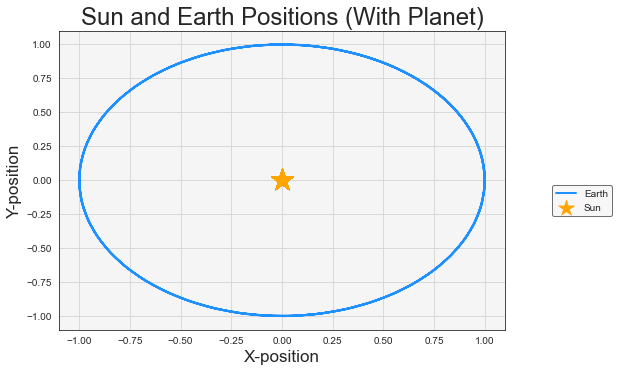

In [10]:
# plotting data
plt.scatter(pos_sun_wp[:,0], pos_sun_wp[:,1], color='orange', label='Sun', s=550,marker='*') 
plt.plot(pos_earth_wp[:,0], pos_earth_wp[:,1],color='dodgerblue',linewidth=2, markersize=12, label='Earth')

# creating titles 
plt.title('Sun and Earth Positions (With Planet)',fontsize = 24)             
plt.xlabel('X-position',fontsize = 17)                     
plt.ylabel('Y-position',fontsize = 17)

# plot grid
plt.grid(color='0.85')
plt.minorticks_on() 

# creating legend
legend=plt.legend(loc="upper right",frameon=True, markerscale=0.75, bbox_to_anchor=(1.25, 0.5))
legend.get_frame().set_edgecolor('0.3')
legend.get_frame().set_linewidth(1)

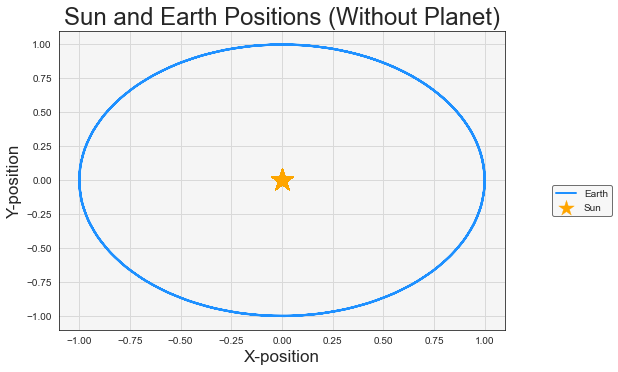

In [11]:
# plotting data 
plt.scatter(pos_sun[:,0], pos_sun[:,1], color='orange', label='Sun', s=550,marker='*') 
plt.plot(pos_earth[:,0], pos_earth[:,1],color='dodgerblue',linewidth=2, markersize=12, label='Earth')

# setting titles
plt.title('Sun and Earth Positions (Without Planet)',fontsize = 24)             
plt.xlabel('X-position',fontsize = 17)                     
plt.ylabel('Y-position',fontsize = 17)

# plot grid
plt.grid(color='0.85')
plt.minorticks_on() 

# plotting legend
legend=plt.legend(loc="upper right",frameon=True, markerscale=0.7, bbox_to_anchor=(1.25, 0.5))
legend.get_frame().set_edgecolor('0.3')
legend.get_frame().set_linewidth(1)

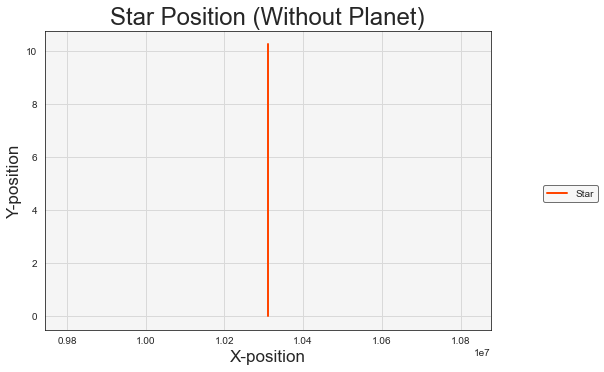

In [12]:
# plotting data 
plt.plot(pos_star[:,0], pos_star[:,1], color='orangered',linewidth=2, markersize=12, label='Star')

# setting titles
plt.title('Star Position (Without Planet)',fontsize = 24)             
plt.xlabel('X-position',fontsize = 17)                     
plt.ylabel('Y-position',fontsize = 17)

# plot grid
plt.grid(color='0.85')
plt.minorticks_on() 

# plotting legend
legend=plt.legend(loc="upper right",frameon=True, markerscale=1, bbox_to_anchor=(1.25, 0.5))
legend.get_frame().set_edgecolor('0.3')
legend.get_frame().set_linewidth(1)

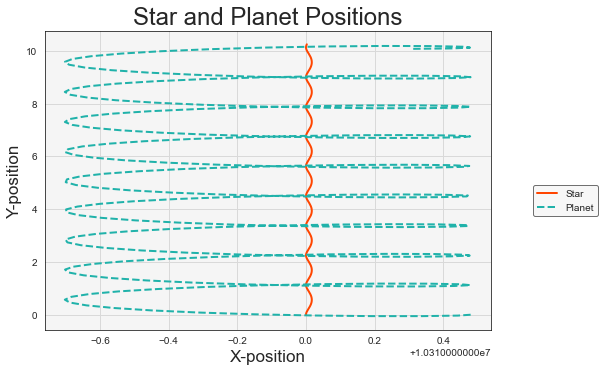

In [13]:
# plotting data 
plt.plot(pos_star_wp[:,0], pos_star_wp[:,1], color='orangered',linewidth=2, markersize=12, label='Star')
plt.plot(pos_planet_wp[:,0], pos_planet_wp[:,1], color='lightseagreen',linewidth=2, markersize=12, label='Planet', linestyle='dashed')

# creating titles 
plt.title('Star and Planet Positions',fontsize = 24)             
plt.xlabel('X-position',fontsize = 17)                     
plt.ylabel('Y-position',fontsize = 17)

# plot grid
plt.grid(color='0.85')
plt.minorticks_on() 

# creating legend
legend=plt.legend(loc="upper right",frameon=True, markerscale=1, bbox_to_anchor=(1.25, 0.5))
legend.get_frame().set_edgecolor('0.3')
legend.get_frame().set_linewidth(1)

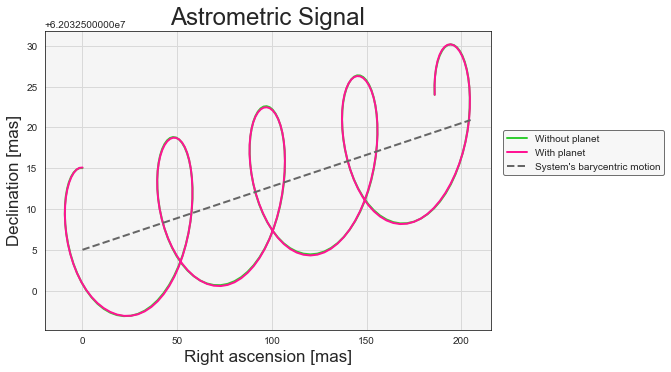

In [14]:
# plotting data 
plt.plot(alpha, delta-1e8, color='limegreen',linewidth=2, markersize=12, label='Without planet')
plt.plot(alpha_wp, delta_wp-1e8, color='deeppink',linewidth=2, markersize=12, label='With planet')
plt.plot(alpha_COM, delta_COM-1e8, color='0.4',linewidth=2, markersize=12, linestyle='dashed', label='System\'s barycentric motion')

# set titles 
plt.title('Astrometric Signal',fontsize = 24)             
plt.xlabel('Right ascension [mas]',fontsize = 17)                     
plt.ylabel('Declination [mas]',fontsize = 17)

# plot grid
plt.grid(color='0.85')
plt.minorticks_on() 

# plot legend
legend=plt.legend(loc="lower right",frameon=True, markerscale = 1, bbox_to_anchor=(1.4, 0.5))
legend.get_frame().set_edgecolor('0.3')
legend.get_frame().set_linewidth(1)

#### The pink data is the signal from the planet and star and the green is just the star. So when we subtract the without planet signal from the with planet signal (planet + star - star), we are left with the signal from just the planet. This data is an elliptical orbit, representing the planets orbit aorund the planet-star barycentre.  

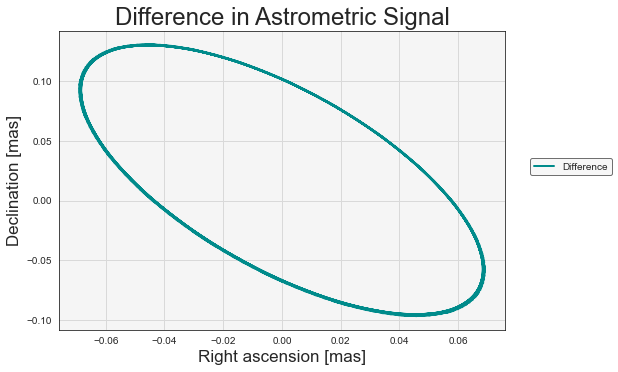

In [15]:
# plotting data 
plt.plot(alpha-alpha_wp, delta-delta_wp, color='darkcyan',linewidth=2, markersize=12, label='Difference')

# set titles 
plt.title('Difference in Astrometric Signal',fontsize = 24)             
plt.xlabel('Right ascension [mas]',fontsize = 17)                     
plt.ylabel('Declination [mas]',fontsize = 17)

# plot grid
plt.grid(color='0.85')
plt.minorticks_on() 

# plot legend
legend=plt.legend(loc="lower right",frameon=True, markerscale = 1, bbox_to_anchor=(1.25, 0.5))
legend.get_frame().set_edgecolor('0.3')
legend.get_frame().set_linewidth(1)

# Reproducing astrometric signal using equations 3.22 and 3.23

## Parameters 

#### Orbital elements:
- semi-major axis: $a =0.6$ AU $\longrightarrow $from caption
- eccentricity: $e=0.2$ $\longrightarrow $ from caption
- argument of pericentre: $\omega =0$ $\longrightarrow $ because we didn't specify $\omega$ in the simulation
- longitude of the ascending node:$\Omega=0$ $\longrightarrow $because we didn't specify $\Omega$ in the simulation
- orbit inclnation: $i=$planet_inclination $\longrightarrow $same inclination we game the planet in the simulation


#### Initial conditions: 
- right ascention at $t_0$: $\alpha$$\longrightarrow $ initial value of $\alpha$ calculated in sim_wp in radians 
- declinaton at $t_0$: $\delta $$\longrightarrow $ initial value of $\delta$ calculated in sim_wp in radians
- $\Delta\alpha_0 =$ $\longrightarrow $ value of $\alpha$ at time 1 - value of $\alpha$ at time 0 from sim_wp
- $\Delta\delta_0 = $ $\longrightarrow $value of $\delta$ at time 1 - value of $\delta$ at time 0 from sim_wp

#### Other:
- Cartesian components of the observer position wrt the solar system barycentre: $r_x,r_y,r_y=$pos_earth_wp $\longrightarrow$ earths position wrt the (simplified) solar system barycenter 
- parallax: $\varpi = 0.02$ as $\longrightarrow $ $\varpi=\frac{1}{d}=\frac{1}{50\text{ pc}}$

#### Angular semi major axis 
- period: $P=$ years $\longrightarrow$ from Keplers third law
- apparent semi major axis: $a=$ arcseconds $\longrightarrow$ using equation from Wright and Howard $a^3=\frac{\varpi^3m^3}{(m_*+m)^2}P^2$

#### Proper motion:
- proper motion: $\mu=0.05$ as/year $\longrightarrow$ from caption
- angle in proper motion triangle: $\theta=0.64$ rad  $\longrightarrow $ from plot, Dec changes 160 mas and RA changes 120 mas
- proper motion in right ascension direction: $\mu_\alpha=\frac{\mu\sin\theta}{\cos\delta}$ $\longrightarrow$ using trig
- proper motion in declination direction: $\mu_\delta=\mu\cos\theta$ $\longrightarrow$ using trig

#### Time paramaters
- time of pericentre passage: $\tau =0$ years $\longrightarrow $ planet starts at pericentre
- $t_0=0$ $\longrightarrow $ term wrt Julian date if I was using the time scale 2018.4-2020.8 but i am already treating time 2018.4 as 0 so this is not needed

In [16]:
a_AU   = 0.6                                          # semi-major axis                                    [AU]
e      = 0.2                                          # ellipticity of the orbit                           [unitless]
omega  = 0                                            # argument of perihelion                             [rad] 
OMEGA  = 0                                            # longitude of the ascending node                    [rad]
i      = planet_inc                                   # orbital inclination                                [rad]

alpha1 = alpha_wp[0]*4.84814e-6 -100                      #                                                    [rad]
delta1 = delta_wp[0]*4.84814e-6 -100                      #                                                    [rad]
change_RA_0  = 0.120*4.84814e-6 #alpha_wp[1] - alpha_wp[0]               # change in RA at time t_0                           [as]
change_DEC_0 = 0.160*4.84814e-6 #delta_wp[1] - delta_wp[0]          # change in DEC at time t_0                          [as]

parallax = 1/50                                       # parallax of the system                             [as]
r = pos_earth_wp

P = a_AU**(3/2)                                       # period of the system                               [years]
a_as = ((parallax*m_planet)**3*(P/(m_star+m_planet))**2)**(1/3) #                                          [as]

proper_motion = 0.05 
theta = np.arctan(0.12/0.16)                             #                                                   [rad]
#theta = (np.pi/2)-(delta1*4.84814e-6)                # older verion of angle (keeping in code just incase)

prop_RA = proper_motion*np.sin(theta)/np.cos(delta1)   # proper motion in RA direction                     [as/year]
prop_DEC = proper_motion*np.cos(theta)                 # proper motion in DEC direction                    [as/year]

tau = 0                                                # time of pericentre passage                        [years]
t0 = 0                                                 # wrt Julian date                                   [years]

In [84]:
M                 = np.zeros((m,1))
E                 = np.zeros((m,1))
X                 = np.zeros((m,1))
Y                 = np.zeros((m,1))
PI                = np.zeros((m,2))
sum_elements      = np.zeros((m,2))
three22           = np.zeros((m,1))
three23           = np.zeros((m,1))
barycentic_motion = np.zeros((m,2))
parallax_motion   = np.zeros((m,2))

In [85]:
A = a_as * (  np.cos(omega) * np.cos(OMEGA) - np.sin(omega) * np.sin(OMEGA) * np.cos(i))
B = a_as * (  np.cos(omega) * np.sin(OMEGA) + np.sin(omega) * np.cos(OMEGA) * np.cos(i))
F = a_as * (- np.sin(omega) * np.cos(OMEGA) - np.cos(omega) * np.sin(OMEGA) * np.cos(i))
G = a_as * (- np.sin(omega) * np.sin(OMEGA) + np.cos(omega) * np.cos(OMEGA) * np.cos(i))

#### Calculate:
- mean anomaly $M$ using the equation: $M=\frac{2\pi}{T}(t-\tau)=\frac{2\pi}{a^{3/2}}(t-\tau)$ (Exoplanet handbook 2.9) 
- Eccentric anomaly $E$ using rebound
- elliptical rectangular coordinates  using the equations $X=\cos(E(t))-e$ and $Y=\sqrt{(1-e^2)}\sin(E(t))$ (Exoplanet handbook equations 3.21)
- Orthogonal components of the displacements due to parallax using equation 3.24 from the Exoplanet handbook: $\Pi_{\alpha,t}=r_x(t)\sin\alpha-r_y(t)\cos\alpha$ and $\Pi_{\beta,t}=\left[r_x(t)\cos\alpha+r_y\sin\alpha\right]\sin\delta-r_z(t)\cos\delta$
- the sum part of equations 3.22 and 3.23 from the Exoplanet handbook: $BX_t+GY_t$ and $AX_t+FY_t$

In [86]:
k = 0
for k, t in enumerate(times):
    M[k] = (2*np.pi/a_AU**(3/2))*(t - tau)
    E[k] = rebound.M_to_E(e,M[k]) 
    X[k] = np.cos(E[k]) - e
    Y[k] = np.sqrt(1-e**2) * np.sin(E[k])
    PI[k,0] =  r[k,0] * np.sin(alpha1) - r[k,1] * np.cos(alpha1)
    PI[k,1] = (r[k,0] * np.cos(alpha1) + r[k,1] * np.sin(alpha1)) * np.sin(delta1) - r[k,2] * np.cos(delta1)
    sum_elements[k,0] = B*X[k] + G*Y[k]
    sum_elements[k,1] = A*X[k] + F*Y[k]

In [87]:
sum_alpha = np.sum(sum_elements[:,0])
sum_delta = np.sum(sum_elements[:,1])

### The final equations we are calculating are:
- 3.22: $\Delta\alpha(t)\cos\delta=\left[BX_t+GY_t\right]+ \Delta\alpha_0\cos\delta+\varpi\Pi_{\alpha,t}+\mu_\alpha(t-t_0)$
- 3.23: $\Delta\delta(t)=\left[AX_t+F_t\right]+\Delta\delta_0+\varpi\Pi_{\alpha,t}+\mu_\delta(t-t_0)$

### Breaking down these equations into common terms:
- $\left[BX_t+GY_t\right]$ and $\left[AX_t+F_t\right]$: projected offsets of the planet wrt the primary star
- $\Delta\alpha_0\cos\delta$ and $\Delta\delta_0$:
- $\varpi\Pi_{\alpha,t}$ and $\varpi\Pi_{\alpha,t}$: astrometric displacements due to parallax
- $\mu_\alpha(t-t_0)$ and $\mu_\delta(t-t_0)$:

In [88]:
for d,t in enumerate(times):
    three22[d] = (sum_alpha + change_RA_0  * np.cos(delta1)   + parallax * PI[d,0] + prop_RA  * (t - t0))
    three23[d] = (sum_delta + change_DEC_0                    + parallax * PI[d,1] + prop_DEC * (t - t0))
    
    barycentic_motion[d,0] = (three22[d] - parallax * PI[d,0])*1000                                       
    barycentic_motion[d,1] = (three23[d] - parallax*PI[d,1])*1000                                           
    
    parallax_motion[d,0] = (three22[d] - sum_alpha - change_RA_0  * np.cos(delta1))*1000                     
    parallax_motion[d,1] = (three23[d] - sum_delta - change_DEC_0)*1000                                      

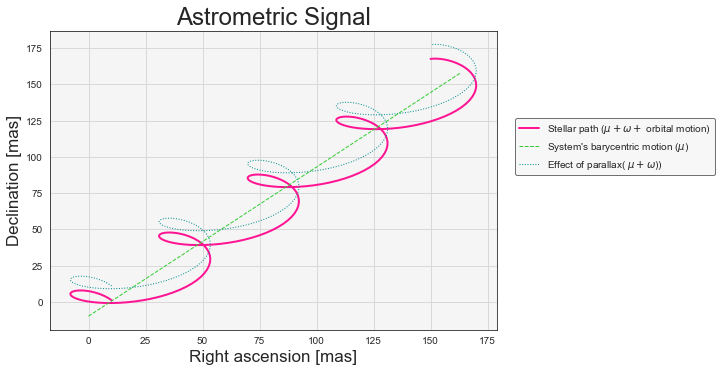

In [89]:
# plotting data multiplied by 1000 to get it into mas
plt.plot(three22*1000               , three23*1000               , color='deeppink' , linewidth=2, markersize=12,                     label = 'Stellar path ($\mu + \omega +$ orbital motion)')
plt.plot(barycentic_motion[:,0], barycentic_motion[:,1], color='limegreen', linewidth=1, markersize=12, linestyle='dashed', label = 'System\'s barycentric motion ($\mu$)')
plt.plot(parallax_motion[:,0]  , parallax_motion[:,1]  , color='darkcyan' , linewidth=1, markersize=12, linestyle='dotted', label = 'Effect of parallax( $\mu + \omega $))')

# set titles 
plt.title('Astrometric Signal'    , fontsize = 24)             
plt.xlabel('Right ascension [mas]', fontsize = 17)                     
plt.ylabel('Declination [mas]'    , fontsize = 17)

# plot grid
plt.grid(color='0.85')
plt.minorticks_on() 

# plot legend
legend=plt.legend(loc="lower right",frameon=True, markerscale = 1, bbox_to_anchor=(1.5, 0.5))
legend.get_frame().set_edgecolor('0.3')
legend.get_frame().set_linewidth(1)

# Comparing both

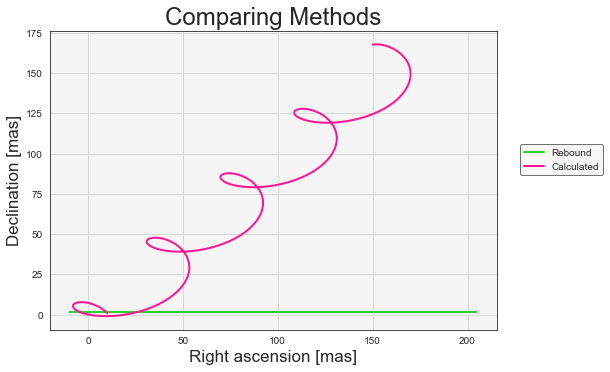

In [90]:
# plotting data 
plt.plot(alpha_wp, delta_wp*1e-8, color='limegreen',linewidth=2, markersize=12, label='Rebound')
plt.plot(three22*1000, three23*1000, color='deeppink',linewidth=2, markersize=12, label='Calculated')

# set titles 
plt.title('Comparing Methods',fontsize = 24)             
plt.xlabel('Right ascension [mas]',fontsize = 17)                     
plt.ylabel('Declination [mas]',fontsize = 17)

# plot grid
plt.grid(color='0.85')
plt.minorticks_on() 

# plot legend
legend=plt.legend(loc="lower right",frameon=True, markerscale = 1, bbox_to_anchor=(1.25, 0.5))
legend.get_frame().set_edgecolor('0.3')
legend.get_frame().set_linewidth(1)

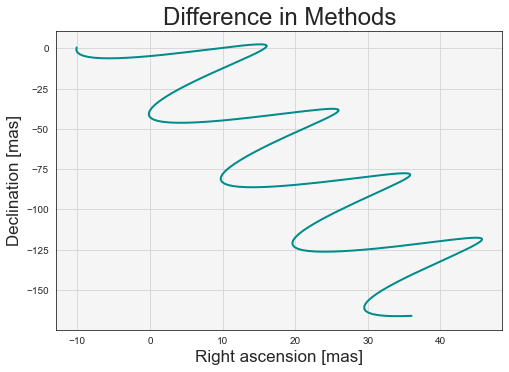

In [92]:
# plotting data 
plt.plot(alpha_wp-three22*1000, delta_wp*1e-8-three23*1000, color='darkcyan',linewidth=2, markersize=12)

# set titles 
plt.title('Difference in Methods',fontsize = 24)             
plt.xlabel('Right ascension [mas]',fontsize = 17)                     
plt.ylabel('Declination [mas]',fontsize = 17)

# plot grid
plt.grid(color='0.85')
plt.minorticks_on() 